# Annotating Circos Plot Node Labels

This example set was contributed by Alireza Hosseini.

/workspaces/nxviz/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.2 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.2, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


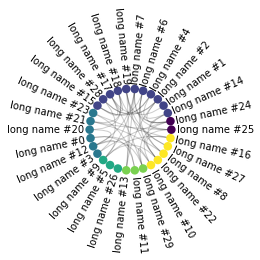

In [1]:
from random import randint

import matplotlib.pyplot as plt
import networkx as nx

import nxviz as nv
from nxviz import annotate

G = nx.erdos_renyi_graph(n=30, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = randint(0, 5)
G = nx.relabel_nodes(G, {i: "long name #" + str(i) for i in range(len(G))})

nv.circos(G, group_by="group", node_color_by="group")
annotate.circos_labels(G, group_by="group", layout="rotate")
# The rotated labels take up more space, so we will have to increase the
# padding a bit. 5% on all sides works well here.
plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))
plt.show()


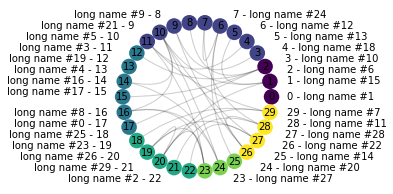

In [2]:
G = nx.erdos_renyi_graph(n=30, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = randint(0, 5)
G = nx.relabel_nodes(G, {i: "long name #" + str(i) for i in range(len(G))})

nv.circos(G, group_by="group", node_color_by="group")
annotate.circos_labels(G, group_by="group", layout="numbers")
# The numbered labels take up more space, so we will have to increase the
# padding a bit. 15% on all sides works well here.
plt.tight_layout(rect=(0.15, 0.15, 0.85, 0.85))
plt.show()
